In [1]:
import pandas as pd
import numpy as np
import geopandas as gd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("D:\Donwlaod\Formation_Data_Science\SBC4G\patient-data-anonymisation-exercise.csv")

### Structure de la base de données

In [3]:
df.shape

(53346, 28)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53346 entries, 0 to 53345
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PATIENT_ID         53346 non-null  object 
 1   START              53346 non-null  object 
 2   STOP               53346 non-null  object 
 3   ENCOUNTERCLASS     53346 non-null  object 
 4   DESCRIPTION        53346 non-null  object 
 5   TOTAL_CLAIM_COST   53346 non-null  float64
 6   PAYER_COVERAGE     53346 non-null  float64
 7   REASONDESCRIPTION  13777 non-null  object 
 8   BIRTHDATE          53346 non-null  object 
 9   DEATHDATE          14287 non-null  object 
 10  SSN                53346 non-null  object 
 11  DRIVERS            49285 non-null  object 
 12  PASSPORT           46965 non-null  object 
 13  FIRST              53346 non-null  object 
 14  LAST               53346 non-null  object 
 15  MAIDEN             16597 non-null  object 
 16  MARITAL            436

Les champs BIRTHDATE et DEATHDATE sont de type chaines de caractères.
Changeons le type de ces données

In [5]:
df = pd.read_csv("D:\Donwlaod\Formation_Data_Science\SBC4G\patient-data-anonymisation-exercise.csv",parse_dates=["BIRTHDATE","DEATHDATE"],dayfirst=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53346 entries, 0 to 53345
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   PATIENT_ID         53346 non-null  object        
 1   START              53346 non-null  object        
 2   STOP               53346 non-null  object        
 3   ENCOUNTERCLASS     53346 non-null  object        
 4   DESCRIPTION        53346 non-null  object        
 5   TOTAL_CLAIM_COST   53346 non-null  float64       
 6   PAYER_COVERAGE     53346 non-null  float64       
 7   REASONDESCRIPTION  13777 non-null  object        
 8   BIRTHDATE          53346 non-null  datetime64[ns]
 9   DEATHDATE          14287 non-null  datetime64[ns]
 10  SSN                53346 non-null  object        
 11  DRIVERS            49285 non-null  object        
 12  PASSPORT           46965 non-null  object        
 13  FIRST              53346 non-null  object        
 14  LAST  

In [7]:
df["BIRTHDATE"].dtype

dtype('<M8[ns]')

In [8]:
df.head()

,PATIENT_ID,START,STOP,ENCOUNTERCLASS,DESCRIPTION,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONDESCRIPTION,BIRTHDATE,DEATHDATE,...,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON
0,034e9e3b-2def-4559-bb2a-7850888ae060,2010-01-23T17:45:28Z,2010-01-23T18:10:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),1983-11-14,NaT,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
1,034e9e3b-2def-4559-bb2a-7850888ae060,2012-01-23T17:45:28Z,2012-01-23T18:00:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,1983-11-14,NaT,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
2,034e9e3b-2def-4559-bb2a-7850888ae060,2015-01-26T17:45:28Z,2015-01-26T18:15:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,1983-11-14,NaT,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
3,034e9e3b-2def-4559-bb2a-7850888ae060,2016-12-29T17:45:28Z,2016-12-29T18:00:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),1983-11-14,NaT,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
4,034e9e3b-2def-4559-bb2a-7850888ae060,2017-01-09T17:45:28Z,2017-01-09T18:00:28Z,outpatient,Encounter for check up (procedure),129.16,54.16,NaN,1983-11-14,NaT,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531


## Méthodes d'anonymisation des données : réaction
### Suppression d'attributs

C:\Users\HP\Anaconda3\envs\datascience\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Wall time: 47.2 s


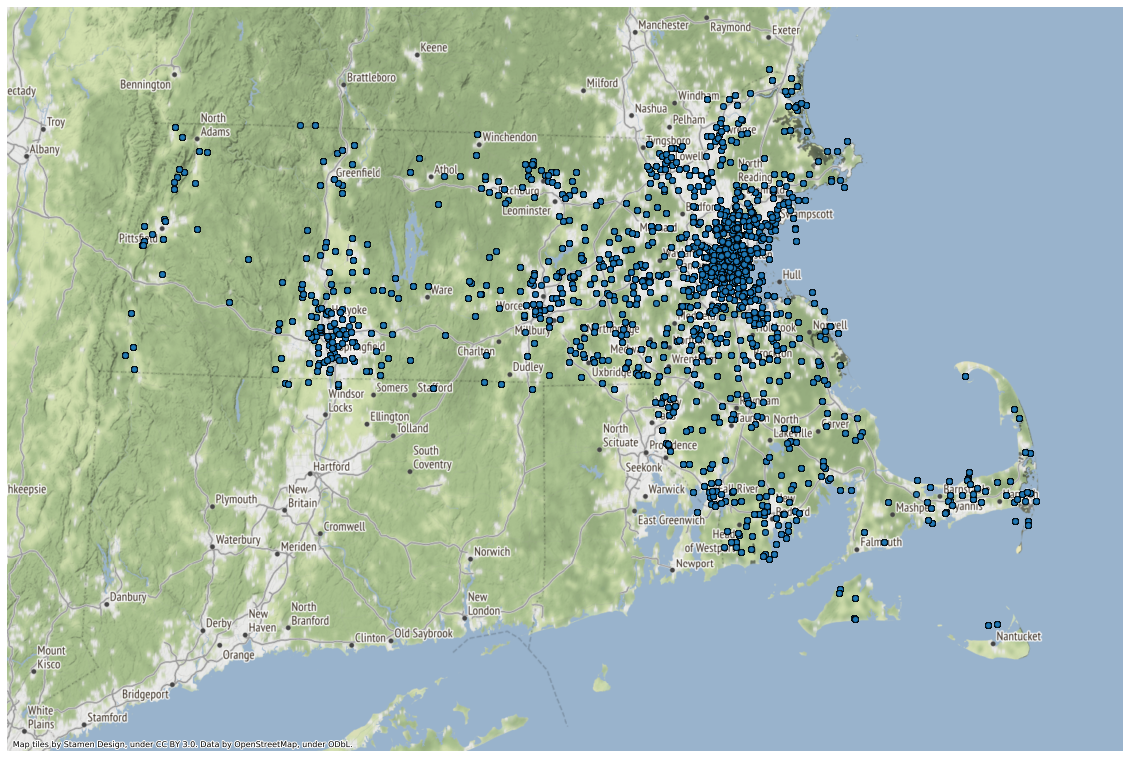

In [9]:
%%time

import contextily as ctx
gdf = gd.GeoDataFrame(df, crs="EPSG:4326", geometry=gd.points_from_xy(df.LON, df.LAT))

# reproject
gdf = gdf.to_crs(epsg=3857)
ax = gdf.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax)
ax.set_axis_off()

In [10]:
# SUPPRESSION DES CHAMPS DONT NOUS N'AVONS PAS BESOIN
suppression = ["SSN", "DRIVERS", "PASSPORT", "FIRST", "LAST", "MAIDEN", "ADDRESS", "ZIP"]
df.drop(suppression, axis=1, inplace=True)

### Pseudonymisation

In [11]:
%%time

from collections import defaultdict
import uuid

class Pseudonymise:

    def __init__(self, sigma=0.001):
        self.sigma = sigma
        self.mu = 0 # Nous voulons nous écarter de la vérité
        # Pseudo-patient dict
        self.pp = defaultdict(lambda: {"uuid":str(uuid.uuid4()),
                                       "lat": np.random.normal(self.mu, self.sigma),
                                       "lon": np.random.normal(self.mu, self.sigma)
                                      })
        
    def create_data(self, identities):
        
        for _id in identities:
            self.pp[_id]
        return self.pp
    
    def redact(self, row):
        return [
            self.pp[row["PATIENT_ID"]]["uuid"],
            row["LAT"] + self.pp[row["PATIENT_ID"]]["lat"],
            row["LON"] + self.pp[row["PATIENT_ID"]]["lon"],
        ]

p = Pseudonymise()
pp_data = p.create_data(df["PATIENT_ID"])

fields = ["PATIENT_ID", "LAT", "LON"]
df[fields] = df[fields].apply(p.redact, axis=1, result_type="expand")

Wall time: 1min 22s


Lançons cette même visualisation de geopandas:

C:\Users\HP\Anaconda3\envs\datascience\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Wall time: 46.4 s


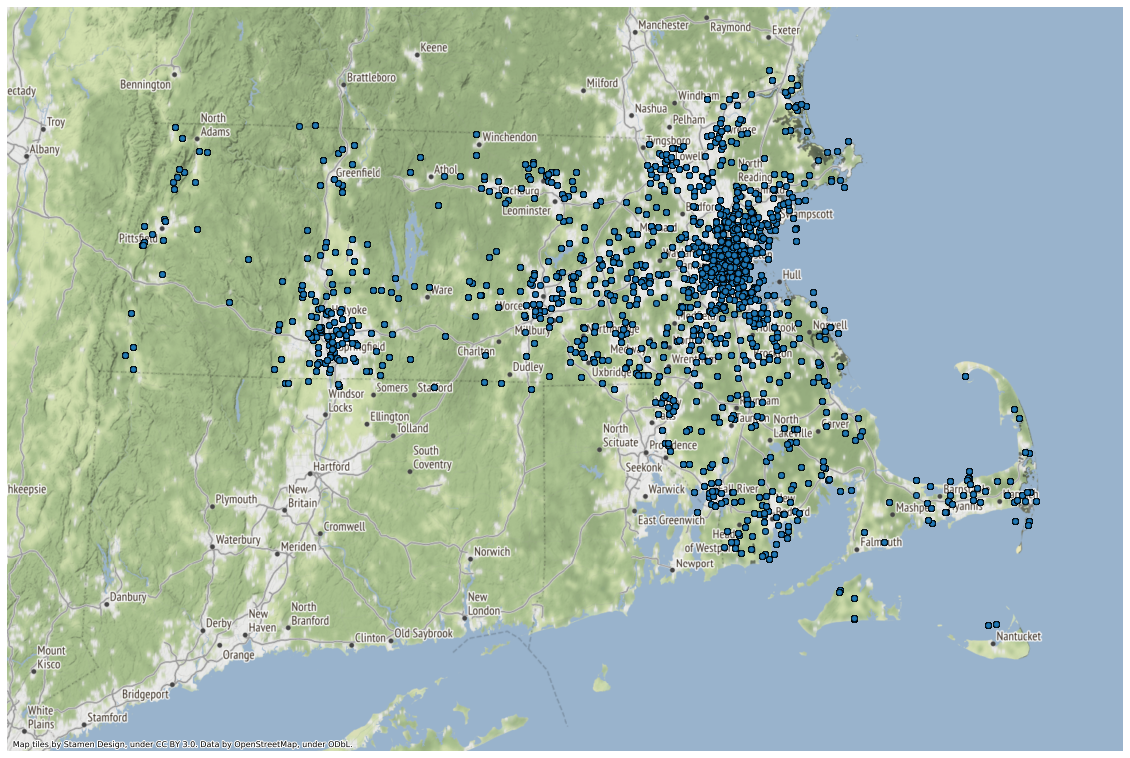

In [12]:
%%time

gdf = gd.GeoDataFrame(df, crs="EPSG:4326", geometry=gd.points_from_xy(df.LON, df.LAT))
gdf = gdf.to_crs(epsg=3857)
ax = gdf.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax)
ax.set_axis_off()

### Généralisation
Réduisons la précision des données contenues dans les champs BIRTHDATE et DEATHDATE en remplacant respectivement la date de naissance et la date de déces par l'année de naissance et l'année de déces.

In [13]:
# BIRTHDATE
import datetime
def extraire_annee(value):
    return value.year

def extraire_annee_death(value):
    return value.year
    
df["DEATHDATE"]=df["DEATHDATE"].apply(extraire_annee_death)
df["BIRTHDATE"]=df["BIRTHDATE"].apply(extraire_annee)

In [14]:
df.head()

,PATIENT_ID,START,STOP,ENCOUNTERCLASS,DESCRIPTION,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONDESCRIPTION,BIRTHDATE,DEATHDATE,...,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,STATE,COUNTY,LAT,LON,geometry
0,53c7c425-63c6-4af7-800e-4f85000eb141,2010-01-23T17:45:28Z,2010-01-23T18:10:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),1983,NaN,...,white,nonhispanic,M,Danvers Massachusetts US,Somerville,Massachusetts,Middlesex County,42.360788,-71.126577,POINT (-71.12658 42.36079)
1,53c7c425-63c6-4af7-800e-4f85000eb141,2012-01-23T17:45:28Z,2012-01-23T18:00:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,1983,NaN,...,white,nonhispanic,M,Danvers Massachusetts US,Somerville,Massachusetts,Middlesex County,42.360788,-71.126577,POINT (-71.12658 42.36079)
2,53c7c425-63c6-4af7-800e-4f85000eb141,2015-01-26T17:45:28Z,2015-01-26T18:15:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,1983,NaN,...,white,nonhispanic,M,Danvers Massachusetts US,Somerville,Massachusetts,Middlesex County,42.360788,-71.126577,POINT (-71.12658 42.36079)
3,53c7c425-63c6-4af7-800e-4f85000eb141,2016-12-29T17:45:28Z,2016-12-29T18:00:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),1983,NaN,...,white,nonhispanic,M,Danvers Massachusetts US,Somerville,Massachusetts,Middlesex County,42.360788,-71.126577,POINT (-71.12658 42.36079)
4,53c7c425-63c6-4af7-800e-4f85000eb141,2017-01-09T17:45:28Z,2017-01-09T18:00:28Z,outpatient,Encounter for check up (procedure),129.16,54.16,NaN,1983,NaN,...,white,nonhispanic,M,Danvers Massachusetts US,Somerville,Massachusetts,Middlesex County,42.360788,-71.126577,POINT (-71.12658 42.36079)


### Méthodes d'anonymisation des données : Aggrégation

In [15]:
dfo = pd.read_csv("D:\Donwlaod\Formation_Data_Science\SBC4G\patient-data-anonymisation-exercise.csv")

L'agrégation nécessite un but, ce but est défini par une question de recherche à laquelle nous devons répondre.
Répondons à la question suivante:
    Pour les patients décédés, résumez la fourchette d'âge, les maladies spécifiques et le coût total et médian du traitement.

In [ ]:
%%time

#dfo = df.copy()
# Convertir les champs de date en dates de pandas
for c in ["START", "STOP", "BIRTHDATE", "DEATHDATE"]:
    dfo[c] = dfo[c].apply(lambda x: pd.to_datetime(x, errors="coerce", dayfirst=True).date())
# Filtre pour le traitement médical final pour tous les patients décédés
dfo = dfo[dfo.STOP==dfo.DEATHDATE]
dfo.sort_values(by="STOP", inplace=True)
dfo.drop_duplicates(subset="PATIENT_ID", keep="last", inplace=True)
# Créer le DEATHAGE 
# Il s'agit d'un calcul TRÈS approximatif de l'âge au décès
dfo["DEATHAGE"] = dfo.DEATHDATE.apply(lambda x: x.year) - dfo.BIRTHDATE.apply(lambda x: x.year)
#df["DEATHAGE"] = df["DEATHDATE"] - df["BIRTHDATE"]
# Et tirez la répartition des décès, divisée en n bacs
dfo["DEATHAGE"].hist(bins=10)